Dataset shape: (5396, 38)
  Facility ID                    Facility Name                     Address  \
0      010001  SOUTHEAST HEALTH MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1      010005         MARSHALL MEDICAL CENTERS  2505 U S HIGHWAY 431 NORTH   
2      010006     NORTH ALABAMA MEDICAL CENTER         1701 VETERANS DRIVE   
3      010007         MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4      010008      CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

  City/Town State  ZIP Code County/Parish Telephone Number  \
0    DOTHAN    AL     36301       HOUSTON   (334) 793-8701   
1      BOAZ    AL     35957      MARSHALL   (256) 593-8310   
2  FLORENCE    AL     35630    LAUDERDALE   (256) 629-1000   
3       OPP    AL     36467     COVINGTON   (334) 493-3541   
4   LUVERNE    AL     36049      CRENSHAW   (334) 335-3374   

          Hospital Type                           Hospital Ownership  ...  \
0  Acute Care Hospitals  Government - Hospital District

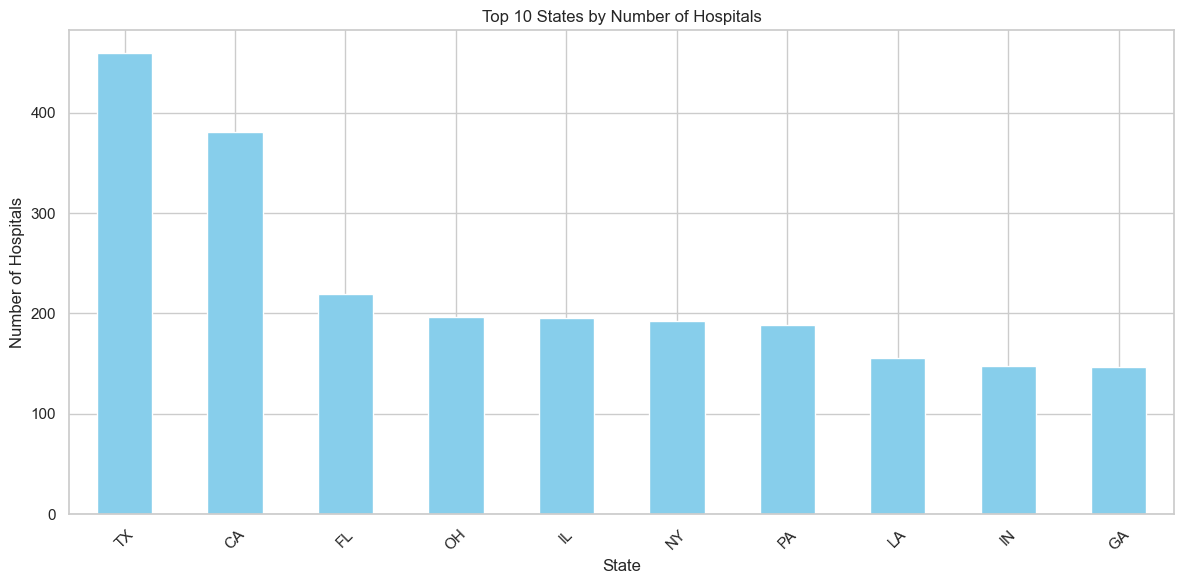

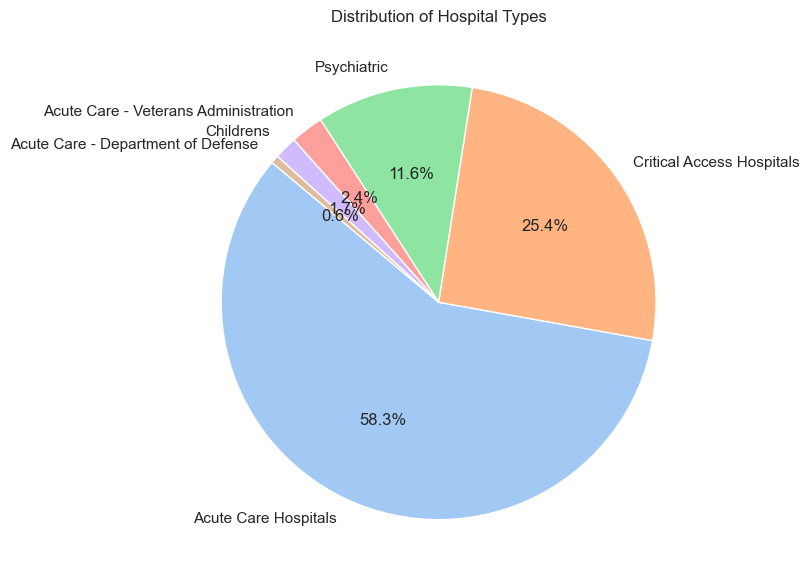

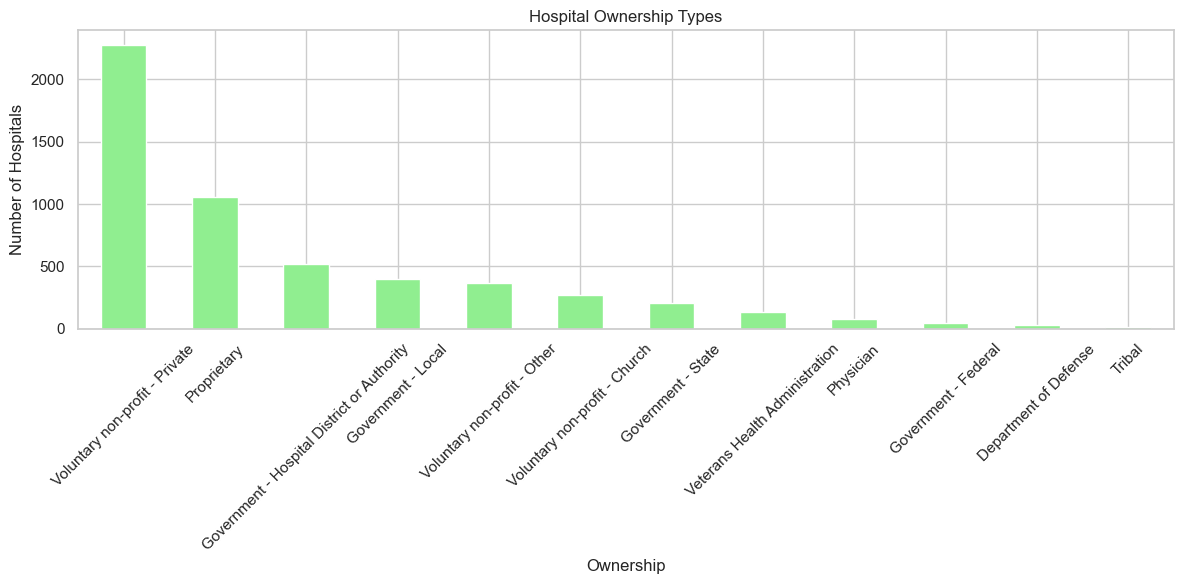

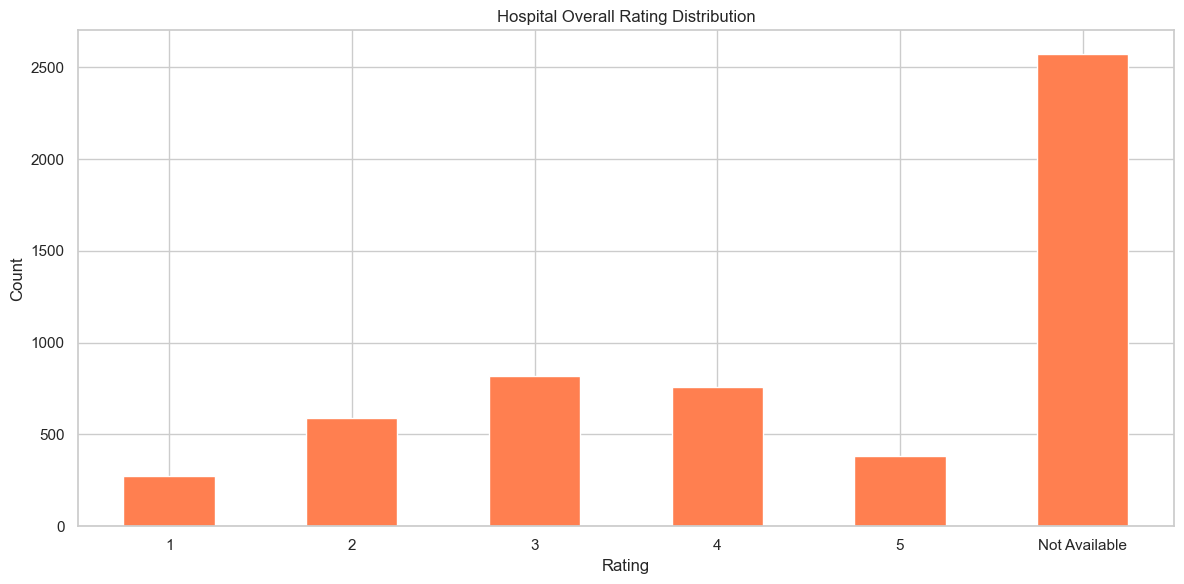

Cleaned data exported to outputs/cleaned_cms_hospital_info.csv


In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load dataset
file_path = 'C:/Users/shazi/data/Hospital_General_Information.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Preview data
print("Dataset shape:", df.shape)
print(df.head())

# Clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Check missing values
print(df.isnull().sum())

# Top 10 states by number of hospitals
top_states = df['state'].value_counts().head(10)
print("Top 10 states by number of hospitals:\n", top_states)

# Plot: Top states by number of hospitals
top_states.plot(kind='bar', color='skyblue')
plt.title("Top 10 States by Number of Hospitals")
plt.xlabel("State")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hospital types distribution
hospital_types = df['hospital_type'].value_counts()
hospital_types.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Hospital Types")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Ownership distribution
ownership = df['hospital_ownership'].value_counts()
ownership.plot(kind='bar', color='lightgreen')
plt.title("Hospital Ownership Types")
plt.xlabel("Ownership")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average hospital rating (if available)
if 'hospital_overall_rating' in df.columns:
    rating_counts = df['hospital_overall_rating'].value_counts().sort_index()
    rating_counts.plot(kind='bar', color='coral')
    plt.title("Hospital Overall Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No overall rating column in dataset.")

# Export cleaned data
df.to_csv('C:/Users/shazi/data/output/cleaned_cms_hospital_info.csv', index=False)
print("Cleaned data exported to outputs/cleaned_cms_hospital_info.csv")

